## Introduction:

A real estate company is interested in learning what variables are driving the price of homes in the Boston area. In an ever-changing landscape of real estate, comprehending the factors that affect home values is important for suitable decision-making. This request will utilize the Boston Housing Dataset derived from information collected by the U.S Census Service regarding housing around Boston, Massachusetts. This data is known for having rich insights for urban housing market dynamics and has many features that in various traits of social, financial, and ecological. The goal would be to use robust regression techniques within a supervised learning environment to study the impact of various factors on home prices. This study will both develop our understanding of regression techniques but will also provide the company and their teams with valuable information on what aspects of the market to target.

The link to the GitHub notebook can be found [here.](https://github.com/aryanbashar/Boston_Housing)

### Disclaimer:

Due note that the original dataset has been edited to remove one column that does not align with my commitment to ethical data practices, and is a step towards avoiding analysis that unconsciously reinforces societal biases.   


### Required Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Loading in the data from Google Drive.

In [4]:
# loading the data
housing_data = pd.read_csv('/content/drive/MyDrive/DTSA/HousingData.csv')

In [5]:
# first 5 rows in the data
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


We can see that there are 13 columns with varying variables that may affect house pricing.

CRIM - per capita crime rate by town

1.   CRIM - per capita crime rate by town
2.   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000 dollars
11. PTRATIO - pupil-teacher ratio by town
12. LSTAT - % lower status of the population
13. MEDV - Median value of owner-occupied homes in 1000's dollars


Let us graph some to see if we can spot any relationships.

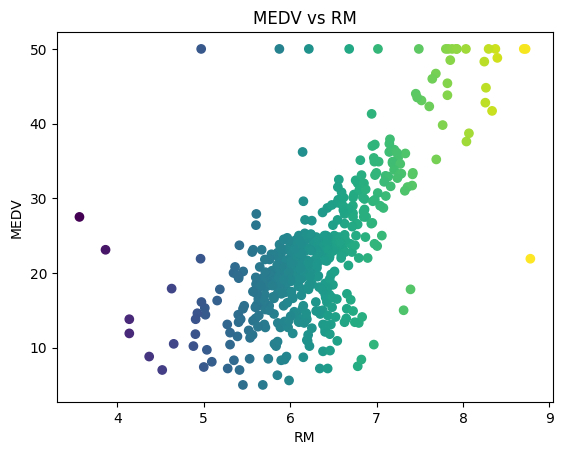

In [6]:
# Median Value Owner-occupied Homes in $1000's vs Average Number of Rooms per
# Dwelling
plt.scatter(housing_data['RM'], housing_data['MEDV'], c=housing_data['RM'])
plt.xlabel('RM')
plt.ylabel('MEDV')
_ = plt.title('MEDV vs RM')

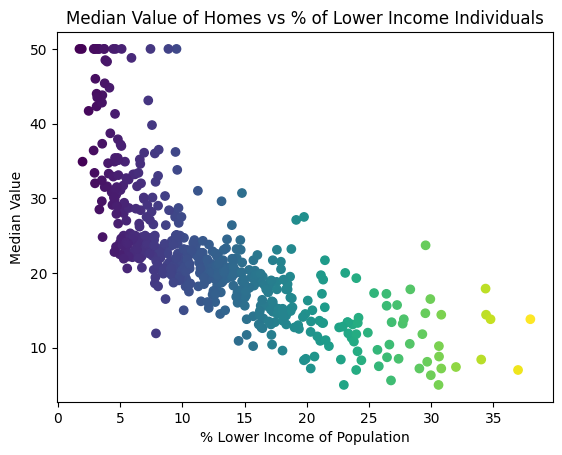

In [19]:
# Median Value Owner-occupied Homes in $1000's vs % Lower Income of Population

plt.scatter(housing_data['LSTAT'], housing_data['MEDV'], c=housing_data['LSTAT'])
plt.xlabel('% Lower Income of Population')
plt.ylabel('Median Value')
_ = plt.title('Median Value of Homes vs % of Lower Income Individuals')

Even prior to modeling, we can see a trend with MEDV and RM and LSTAT.

## Exploratory Data Analysis (EDA):

Let us check for missing values, duplicates, and outliers that may affect the model training and performance.

In [23]:
#check if there is any missing value :
housing_data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

One way of dealing with missing data points is filling in it in with the mean of the column.

In [24]:
housing_data.fillna(housing_data.mean(), inplace=True)

#check if there is any missing value :
housing_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Now the missing values are dealt with.

In [25]:
#check if there is any duplicated values
housing_data.duplicated().sum()

0

There are no duplicated values.

In [26]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


There are 13 columns and 506 rows.

In [12]:
housing_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.611874,8.545770,0.00632,0.083235,0.29025,3.611874,88.9762
ZN,506.0,11.211934,22.921051,0.00000,0.000000,0.00000,11.211934,100.0000
INDUS,506.0,11.083992,6.699165,0.46000,5.190000,9.90000,18.100000,27.7400
CHAS,506.0,0.069959,0.250233,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.518519,27.439466,2.90000,45.925000,74.45000,93.575000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Let us graph the columns to see how the distribution is visually.

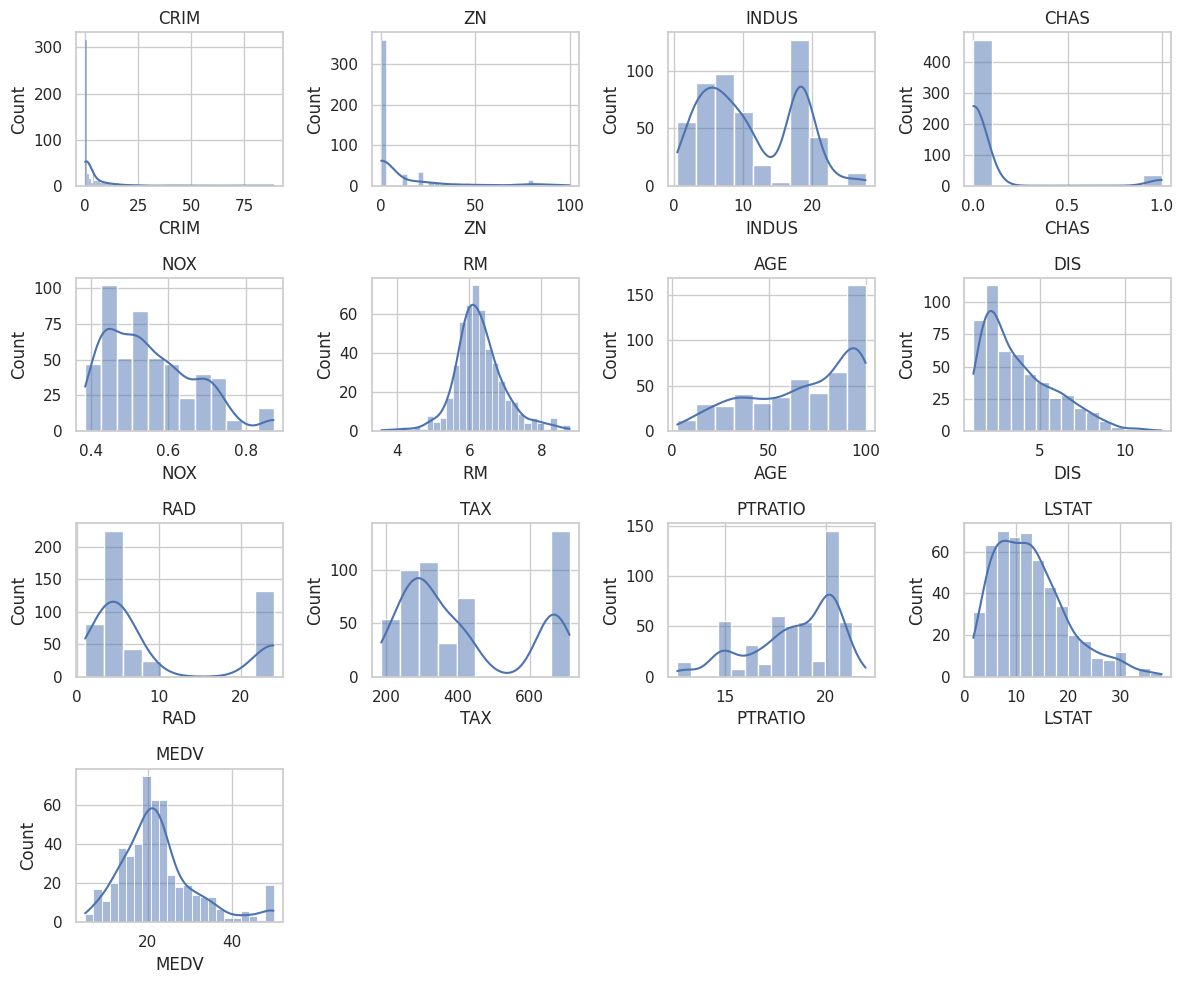

In [13]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 10))

# Flatten the axes
axes = axes.flatten()

# Loop through each column and plot histogram
for i, col in enumerate(housing_data.columns):
    sns.histplot(housing_data[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(len(housing_data.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Let us check for outliers in the data that may affect training of the model.

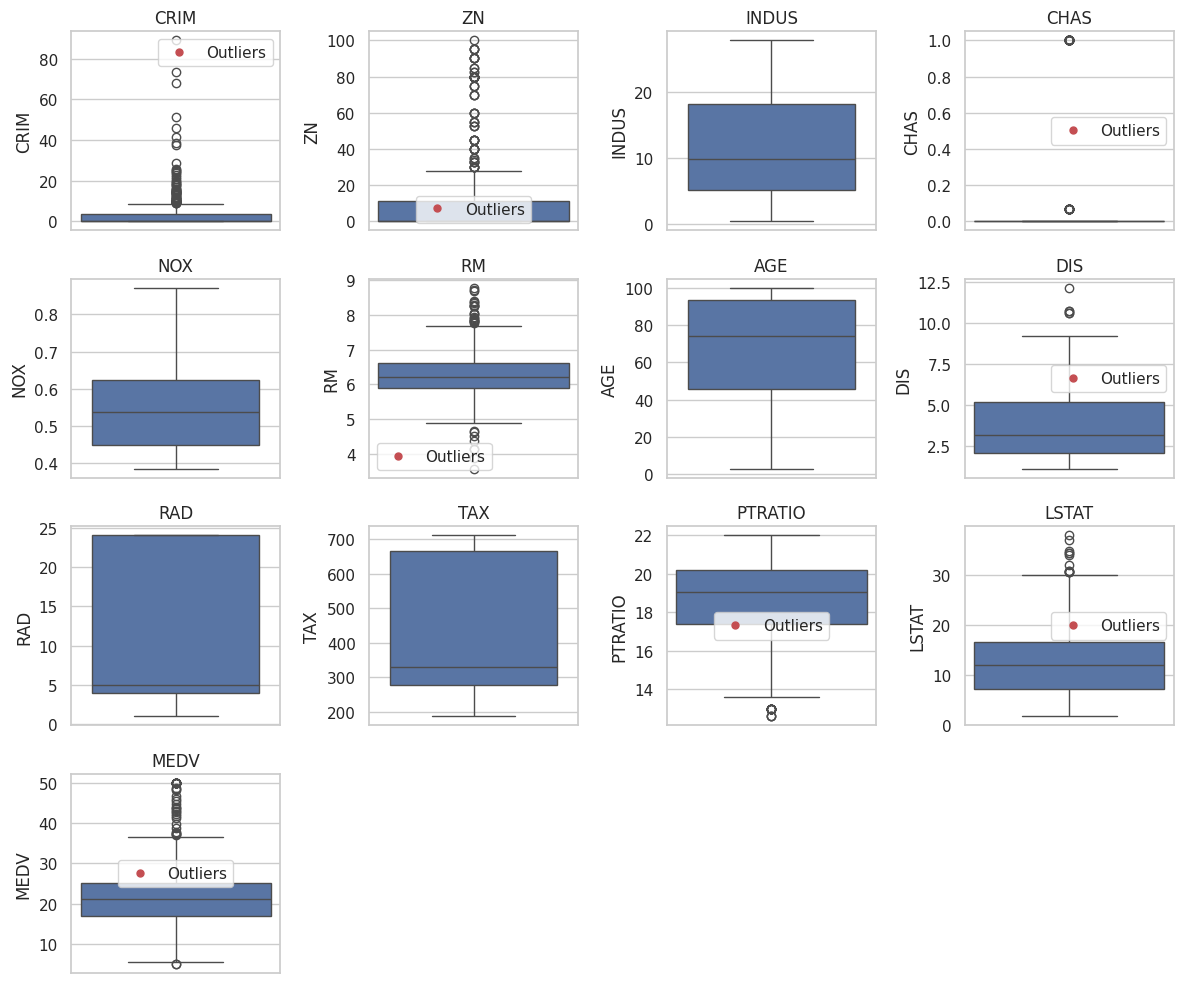

In [14]:
# Define function to detect and handle outliers
def handle_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 10))

# Flatten the axes
axes = axes.flatten()

# Loop through each column and plot box plot with outlier detection
for i, col in enumerate(housing_data.columns):
    sns.boxplot(y=housing_data[col], ax=axes[i])
    axes[i].set_title(col)

    # Detect and handle outliers
    outliers = handle_outliers(housing_data, col)
    if not outliers.empty:
        axes[i].plot([], [], 'ro', markersize=5, label='Outliers')
        axes[i].legend()

# Remove any unused subplots
for j in range(len(housing_data.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Based on the boxplots we can see that there are outliers that can be removed. Since housing data commonly has outliers, then removing them can be detrimental to analysis. These outliers are not usually noise, but real representations of luxury properties. We could lose important information about the higher end of the market if this is done. Also, removing these outliers would reduce the amount of data available by a significant level. Instead, we can use robust regression models that are less sensitive to outliers like Random Forests and Gradient Boosting.

Still, I have included a way to remove outliers as a learning step. The below function would remove any data point below the lower bound and above the higher bound. These are calculated as Lower Bound = First Quartile - 1.5 * Interquartile Range and Higher Bound = Third Quartile + 1.5 * Interquartile Range.

In [20]:
# Define function to remove outliers
def remove_outliers(data, cols):
    clean_data = data.copy()
    for col in cols:
        q1 = clean_data[col].quantile(0.25)
        q3 = clean_data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]
    return clean_data

# List of columns to check for outliers
columns_with_outliers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

# Remove outliers from the dataset
housing_data_cleaned = remove_outliers(housing_data, columns_with_outliers)

Let us check the box plots again to see how it has changed with outliers removed.

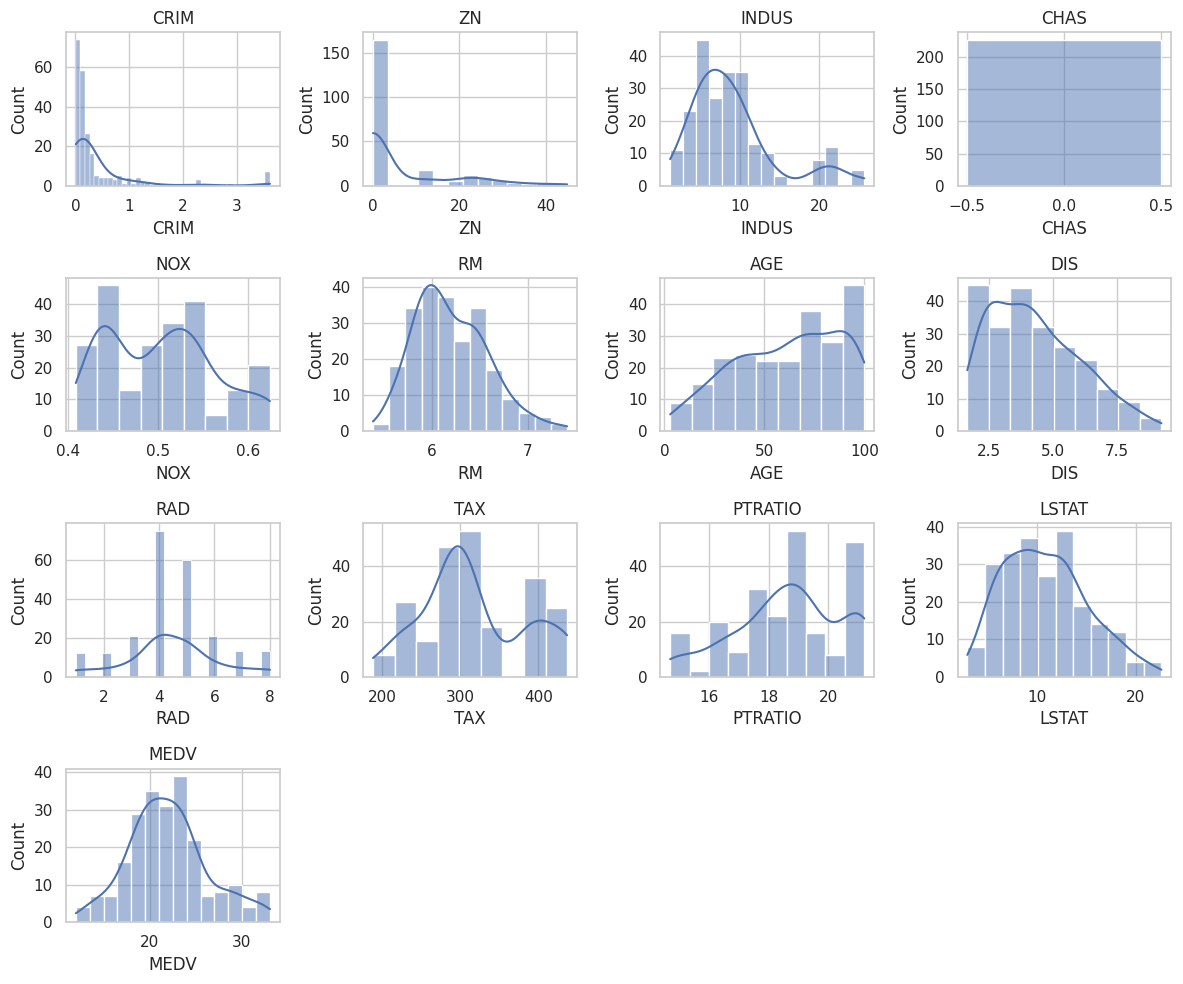

In [17]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 10))

# Flatten the axes
axes = axes.flatten()

# Loop through each column and plot histogram
for i, col in enumerate(housing_data_cleaned.columns):
    sns.histplot(housing_data_cleaned[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(len(housing_data_cleaned.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

The above would be how outlier removal would look like. However for this case, we will continue with the dataframe prior to removing the outliers.

## Model Building and Training:

Since we have a target variable in MEDV and we want to see how the features affect 'MEDV' or Median value of owner-occupied homes in $1000's. We can begin with the simple but effective Linear Regression model, after splitting the data into training and testing sets.

In [27]:
# Step 1: Split the data into features (X) and target variable (y)
X = housing_data.drop(columns=['MEDV'])
y = housing_data['MEDV']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Use Linear Regression model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 23.655176753762372
R-squared: 0.6774313865405359


The above are slighty weak results, so let us compare it with some other models that may provide a better performance.  A Decision tree Regressor may find more complex nonlinear relationships between median house value and the features. It handles feature interactions and feature importance by itself but can be prone to overfitting. A Random Forest Regressor instead puts together multiple decision trees through ensemble learning to lower overfitting and enhance generality. It usually performs better than a single decision tree, but has trouble if there is lots of noise in the data.

In [29]:
# Initialize the models
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

# Train the models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Evaluate the models
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Decision Tree:")
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)
print("\nRandom Forest:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)


Decision Tree:
Mean Squared Error: 11.258725490196078
R-squared: 0.8464728668698006

Random Forest:
Mean Squared Error: 8.085797470588238
R-squared: 0.8897398017376112


##Hyperparameter Tuning:

Based on the above, the Random Forest Regressor would be the better choice between the two. Let us see if we can make it perform even better by using GridSearchCV. It is an optimizer that will go through and check specific parameters to find the combination that performs the best. This would save time from manually changing it and rerunning the model many times.

In [30]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regression model
random_forest = RandomForestRegressor(random_state=42)

# Perform Grid Search cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on the testing set
y_pred_best = best_estimator.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", mse_best)
print("Best R-squared:", r2_best)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Mean Squared Error: 10.764760252450971
Best R-squared: 0.8532087151576926


After GridSearch, we are able to find the parameters and compare performance with Linear Regression, which did not perform well with a dataset with many outliers.

## Results:

Let us explore the results from our model and see which features are most important.

Feature ranking:
1. Feature RM (0.307729)
2. Feature LSTAT (0.238885)
3. Feature PTRATIO (0.082731)
4. Feature NOX (0.068053)
5. Feature DIS (0.067043)
6. Feature INDUS (0.065155)
7. Feature CRIM (0.057546)
8. Feature AGE (0.039535)
9. Feature TAX (0.039445)
10. Feature CHAS (0.013660)
11. Feature RAD (0.012164)
12. Feature ZN (0.008055)


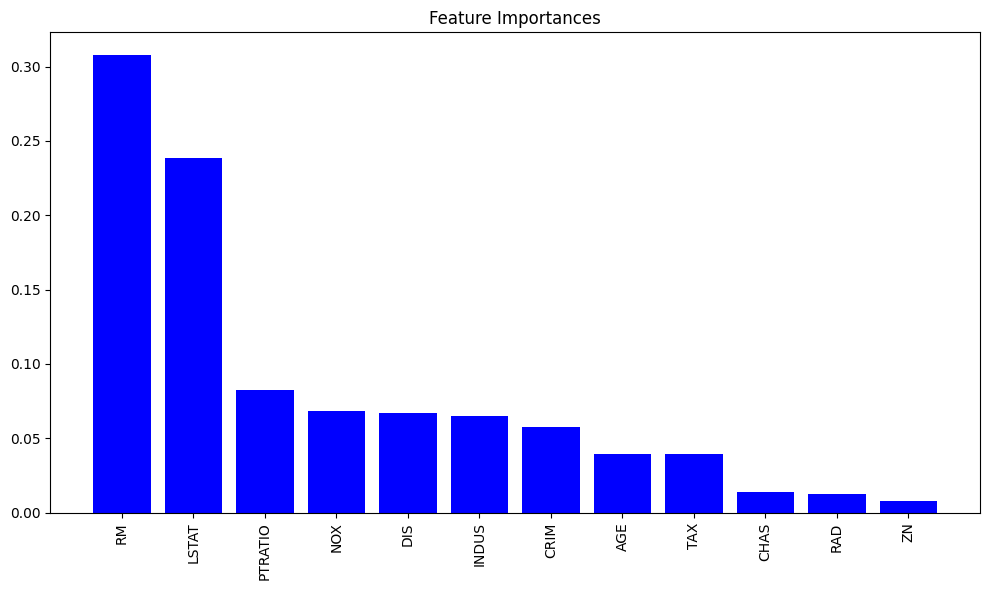

In [31]:
importances = best_estimator.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


The Boston housing dataset has many features and not all of them may be important. We can use a preprocessing step like Principal Component Analysis (PCA) which reduces dimensionality of the features and makes them into smaller components while retaining most of the variance in the data.

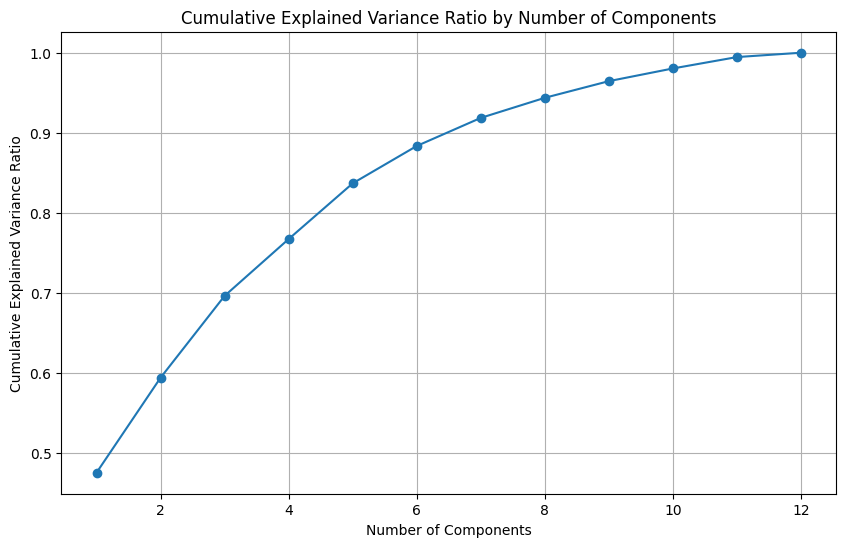

In [32]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Analyze explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # Choose number of components explaining 95% of variance

# Transform data using selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Analyze principal components
components_df = pd.DataFrame(pca.components_, columns=X.columns)

# Visualize explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

In [33]:
# Define the steps of the pipeline
steps = [
    ('scaler', StandardScaler()),  # Standardize the data
    ('pca', PCA()),  # Apply PCA transformation
    ('random_forest', RandomForestRegressor(random_state=42))  # Random Forest Regression model
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the hyperparameter grid with PCA included
param_grid = {
    'pca__n_components': [5, 10, 15],  # Number of principal components to keep
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 10, 20],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4],
    'random_forest__max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_pca = grid_search.best_params_
best_estimator_pca = grid_search.best_estimator_

# Evaluate the best estimator on the testing set
y_pred_best_pca = best_estimator_pca.predict(X_test)
mse_best_pca = mean_squared_error(y_test, y_pred_best_pca)
r2_best_pca = r2_score(y_test, y_pred_best_pca)

print("Best Parameters with PCA:", best_params_pca)
print("Best Mean Squared Error with PCA:", mse_best_pca)
print("Best R-squared with PCA:", r2_best_pca)


Best Parameters with PCA: {'pca__n_components': 10, 'random_forest__max_depth': None, 'random_forest__max_features': 'auto', 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 200}
Best Mean Squared Error with PCA: 16.270484551470567
Best R-squared with PCA: 0.7781311170610155


In [34]:
# Define the steps of the pipeline
steps = [
    ('scaler', StandardScaler()),  # Standardize the data
    ('pca', PCA()),  # Apply PCA transformation
    ('svr', SVR())  # Support Vector Regression model
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the hyperparameter grid with PCA included
param_grid = {
    'pca__n_components': [5, 10, 15],  # Number of principal components to keep
    'svr__C': [0.1, 1, 10],  # Regularization parameter
    'svr__epsilon': [0.1, 0.2, 0.5],  # Epsilon parameter
    'svr__kernel': ['linear', 'rbf']  # Kernel function
}

# Perform Grid Search cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_pca_svr = grid_search.best_params_
best_estimator_pca_svr = grid_search.best_estimator_

# Evaluate the best estimator on the testing set
y_pred_best_pca_svr = best_estimator_pca_svr.predict(X_test)
mse_best_pca_svr = mean_squared_error(y_test, y_pred_best_pca_svr)
r2_best_pca_svr = r2_score(y_test, y_pred_best_pca_svr)

print("Best Parameters with PCA and SVR:", best_params_pca_svr)
print("Best Mean Squared Error with PCA and SVR:", mse_best_pca_svr)
print("Best R-squared with PCA and SVR:", r2_best_pca_svr)


Best Parameters with PCA and SVR: {'pca__n_components': 10, 'svr__C': 10, 'svr__epsilon': 0.2, 'svr__kernel': 'rbf'}
Best Mean Squared Error with PCA and SVR: 14.940144993420324
Best R-squared with PCA and SVR: 0.7962719997581735


PCA with Support Vector Regression actually performed quite well for this dataset, but it is difficult to extract feature importance from them. Let us try Randomized Search instead of Grid Search to see how they compare. It works well by randomly sampling from different distributions and hyperparameters. We also continue with the Random Forest Regressor to make the comparison fair.

In [35]:
# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_depth': [None] + list(range(10, 31, 5)),  # Maximum depth of the trees
    'min_samples_split': randint(2, 11),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize the Random Forest Regression model
random_forest = RandomForestRegressor(random_state=42)

# Perform Random Search cross-validation
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_random = random_search.best_params_
best_estimator_random = random_search.best_estimator_

# Evaluate the best estimator on the testing set
y_pred_best_random = best_estimator_random.predict(X_test)
mse_best_random = mean_squared_error(y_test, y_pred_best_random)
r2_best_random = r2_score(y_test, y_pred_best_random)

print("Best Parameters with Random Search:", best_params_random)
print("Best Mean Squared Error with Random Search:", mse_best_random)
print("Best R-squared with Random Search:", r2_best_random)


Best Parameters with Random Search: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 177}
Best Mean Squared Error with Random Search: 10.73405541273548
Best R-squared with Random Search: 0.853627414949143


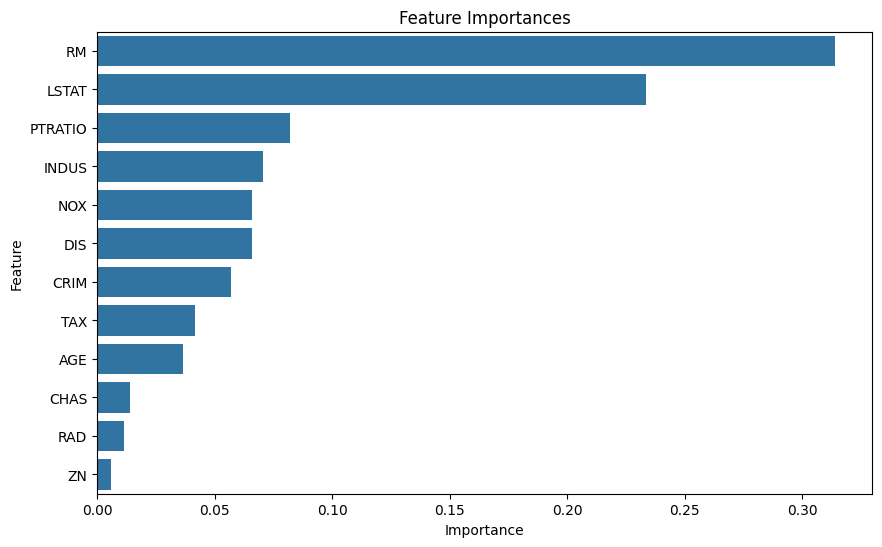

In [36]:
# Extract feature importances
feature_importances = best_estimator_random.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


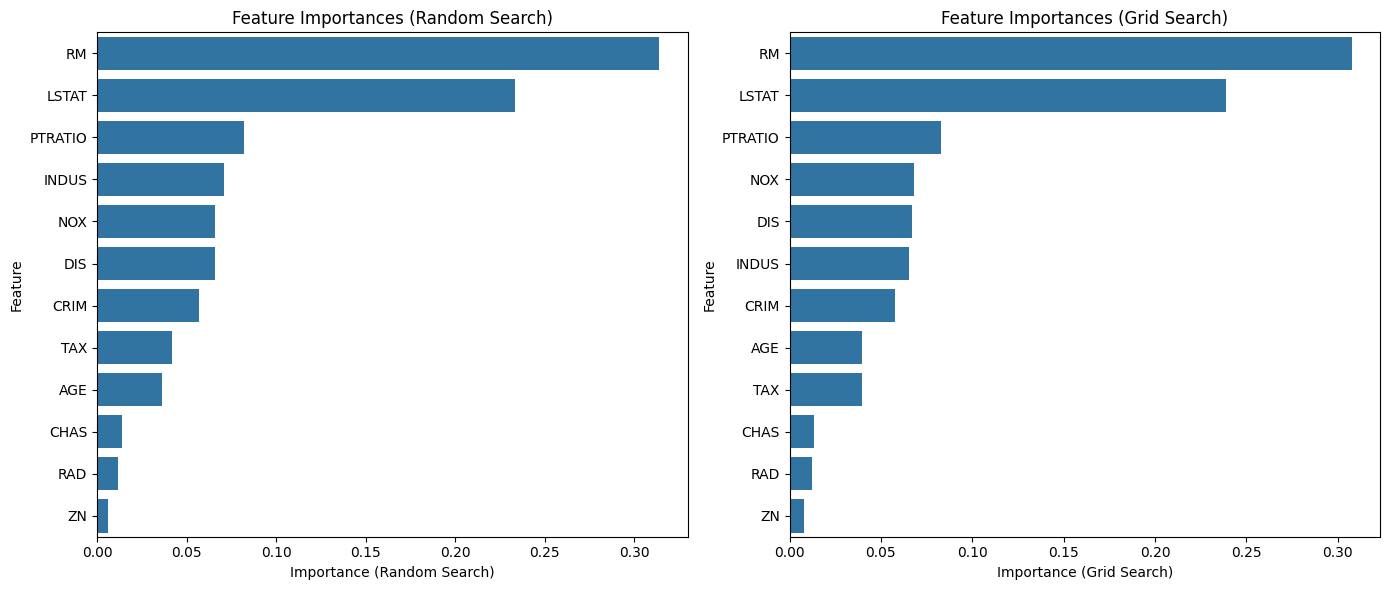

In [37]:
# Extract feature importances from the best Random Forest Regression model obtained from Random Search
feature_importances_random = best_estimator_random.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_random = pd.DataFrame({'Feature': X.columns, 'Importance (Random Search)': feature_importances_random})
feature_importance_df_random = feature_importance_df_random.sort_values(by='Importance (Random Search)', ascending=False)

# Extract feature importances from the other Random Forest Regression model (best_estimator)
feature_importances_other = best_estimator.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_other = pd.DataFrame({'Feature': X.columns, 'Importance (Grid Search)': feature_importances_other})
feature_importance_df_other = feature_importance_df_other.sort_values(by='Importance (Grid Search)', ascending=False)

# Plot feature importances comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Importance (Random Search)', y='Feature', data=feature_importance_df_random)
plt.xlabel('Importance (Random Search)')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Search)')

plt.subplot(1, 2, 2)
sns.barplot(x='Importance (Grid Search)', y='Feature', data=feature_importance_df_other)
plt.xlabel('Importance (Grid Search)')
plt.ylabel('Feature')
plt.title('Feature Importances (Grid Search)')

plt.tight_layout()
plt.show()



It appears that the features RM (average number of rooms per dwelling), LSTAT (% lower status of the population), PTRATIO (Pupil-Teacher ratio by town), INDUS (proportion of non-retail business acres per town), and NOX (nitric oxides concentration) are among the top 5 features in terms of importance for predicting the target variable (median value of owner-occupied homes). There was a difference for Grid Search which found the top 5 as RM, LSTAT, PTRATIO, NOX, and DIS - weighted distances to five Boston employment centres). It is interesting to see what different hyperparameter tuning techniques would lead to different feature importance rankings.

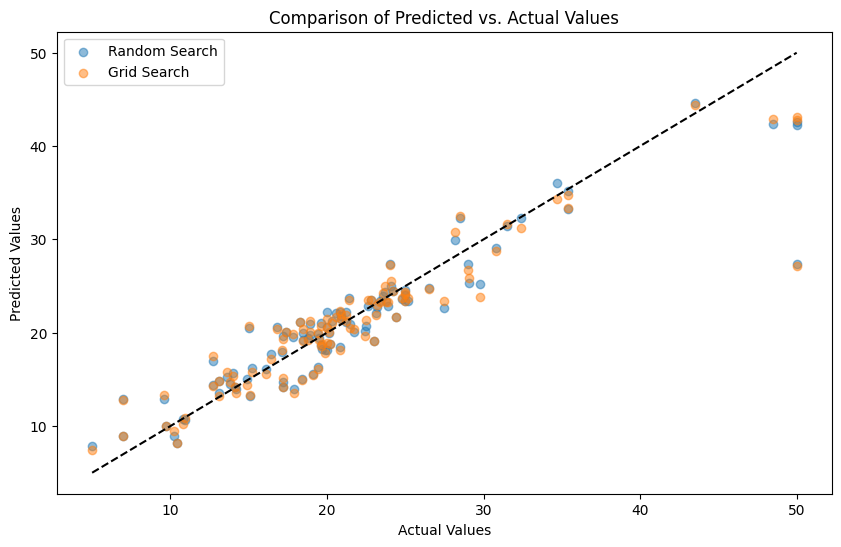

Best Parameters with Random Search: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 177}
Best Parameters with Grid Search: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error with Random Search: 10.73405541273548
Mean Squared Error with Grid Search: 10.764760252450971
R-squared with Random Search: 0.853627414949143
R-squared with Grid Search: 0.8532087151576926


In [38]:
# Step 1: Comparison of Model Performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_random, label='Random Search', alpha=0.5)
plt.scatter(y_test, y_pred_best, label='Grid Search', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted vs. Actual Values')
plt.legend()
plt.show()

# Step 2: Comparison of Hyperparameters
print("Best Parameters with Random Search:", best_params_random)
print("Best Parameters with Grid Search:", best_params)

# Step 3: Analysis of Model Variability
print("Mean Squared Error with Random Search:", mse_best_random)
print("Mean Squared Error with Grid Search:", mse_best)

print("R-squared with Random Search:", r2_best_random)
print("R-squared with Grid Search:", r2_best)


## Discussion:

Overall, we found that the Random Forest Regression model performed better than the Decision Tree Regression. Since Decision Trees can be prone to overfitting, the model may have captured noise from the data. Random Forest can avoid this by averaging predictions from multiple trees, known as ensemble learning. This also helps with keeping a more stable and reliable prediction and works well when confronted by unseen data. The ensemble learning can also identify more complex nonlinear relationships that may be missed by Decision Tree. Finally, Random Forest Regression is less sensitive to hyperparameters and can provide better performance right away, while Decision Tree Regression may require more tuning to achieve better results. As a sidenote, we also saw that these supervised learning models outperformed techniques like Principal Component Analysis which do not require labeled data. The models were probably able to benefit more from the labeled data and draw better predictions.

Continuing with the Random Forest Regression, we compared both Grid Search and Randomized Search to see which can find the best combination of hyperparameters. Both performed well and almost identical, but Randomized Search etched out over the other and this can be due to a few reasons. If the amount of space allotted for tuning is smaller, then Grid Search would be able to all combinations in a grid more systematically. Also, the data does not have many features which may benefit Grid Search, as sampling from many different features is a strong suite of Randomized Search. The "Comparison of Predicted vs. Actual Values" plot serves as a visual diagnostic tool to evaluate the performance and behavior of the regression model. It helps in understanding how well the model generalizes to unseen data and provides guidance for potential model improvements or adjustments. We can see that Randomized Search is just slightly better than Grid Search, but both perform adequately. Overall, we definitely could not have gone wrong with either approach.

Both models provided similar top features in relation to median house price. It looks to be that RM (average number of rooms per dwelling), LSTAT (% lower status of the population), NOX (nitric oxides concentration), PTRATIO  (Pupil-Teacher ratio by town), and INDUS (proportion of non-retail business acres per town) are among the top 5 features in terms of importance for predicting the target variable (median value of owner-occupied homes). Grid Search found the top 5 as RM, LSTAT, PTRATIO, NOX, and DIS (weighted distances to five Boston employment centers). It was important to see that both models came to similar conclusions, but slight changes in rankings. There is a benefit in learning and utilizing different regression models for analysis.


## Future Steps:


1.   Further Tuning - Other tuning techniques that are newer or more developed can be utilized that could potentially enhance model performance.
2.   Additional Data - Larger datasets of similar frameworks could be used to provide the models with more information to learn from. Likewise, other datasets may have more relevant features that impact housing prices that are being missed here.
3. Model Ensembles - The use of model blending techniques to put the predictions of different models together, which often leads to better generalization.



## Conclusion:

This project aimed to use advanced regression techniques to predict the median value homes in the Boston area through various features. Through standard exploratory data analysis and cleaning, the dataset was prepared for training. The use of rigorous hyperparameter tuning through Random Search and Grid Search provided optimal architectures for improving model performance. The results from this project not only helped with making informed real estate decisions but provided a unique look into the dynamics of the Boston housing market. Based on the model result, we can provide this information to the real estate company. Otherwise, our model can also be used to predict on their unseen data. This should overall provide significant information for the company to make the right choices.

## Citations:

Bischl, B., Binder, M., Lang, M., Pielok, T., Richter, J., Coors, S., ... & Lindauer, M. (2023). Hyperparameter optimization: Foundations, algorithms, best practices, and open challenges. *Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery*, 13(2), e1484.

De Ville, B. (2013). Decision trees. *Wiley Interdisciplinary Reviews: Computational Statistics*, 5(6), 448-455.

Harrison, D., & Rubinfeld, D. L. (1978). Hedonic housing prices and the demand for clean air. *Journal of Environmental Economics and Management*, 5(1), 81–102. https://doi.org/10.1016/0095-0696(78)90006-2

Liaw, A., & Wiener, M. (2002). Classification and regression by randomForest. *R news*, 2(3), 18-22.